### Imagine que temos um laboratório de análises clínicas que deseja prever os resultados de exames de diabetes com base em características dos pacientes, como idade, peso e altura.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_exames = pd.read_csv("./datasets/exame_diabetes.csv")
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [11]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genero     100 non-null    object
 1   idade      100 non-null    int64 
 2   peso       100 non-null    int64 
 3   altura     100 non-null    int64 
 4   resultado  100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [9]:
df_exames.genero.unique()

array(['M', 'F'], dtype=object)

In [21]:
# Remover a coluna id_paciente pq n vai ser util na analise

df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [13]:
# transformar a coluna categorica em duas colunas binarias para não peso as variaveis One-Hot encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [22]:
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


<Axes: >

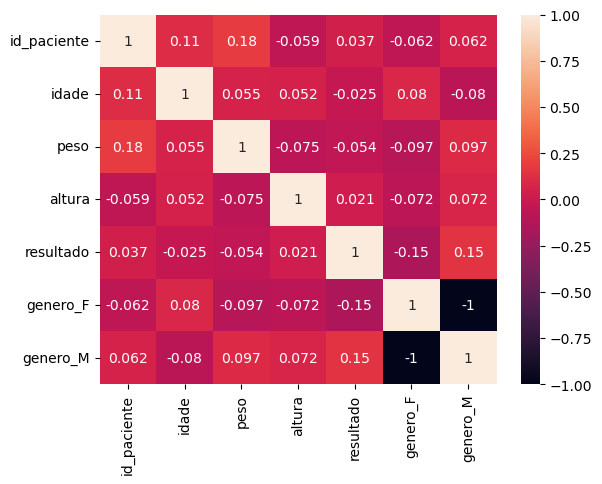

In [15]:
# Mapa de calor com correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True)

<Axes: >

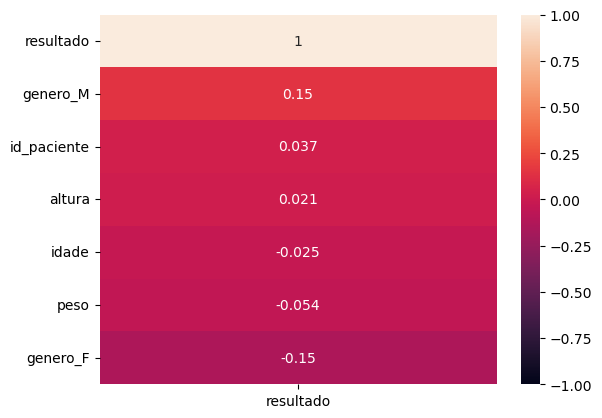

In [18]:
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), 
            vmin=-1, vmax=1, annot=True)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


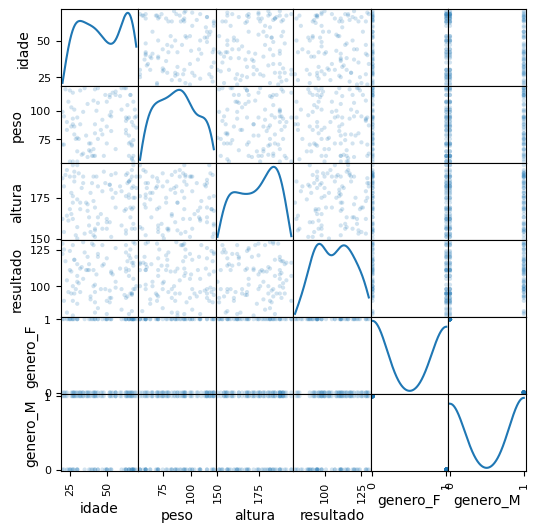

In [25]:
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

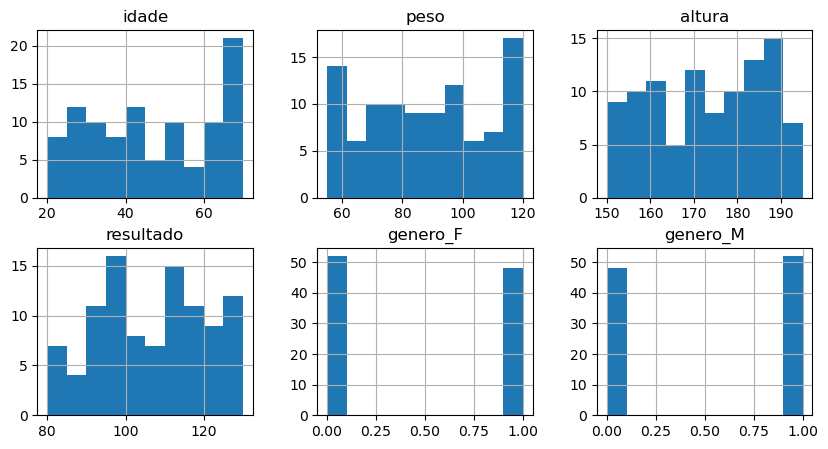

In [24]:
df_exames.hist(layout=(2,3), figsize=(10,5))

In [26]:
df_exames['imc'] = df_exames['peso'] / ((df_exames['altura']/100) ** 2)

In [27]:
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
# modelo 1 sem imc

x = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']


In [30]:
seed = 51
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=seed)

In [31]:
model_1 = LinearRegression().fit(x_train,y_train)

In [32]:
y_pred = model_1.predict(x_test)

In [33]:
# R2 Score

model_1.score(x_test,y_test)
r2_score(y_test,y_pred)

-0.13640904479106397

In [34]:
# MAE (Mean absolute Error)
mean_absolute_error(y_test,y_pred)

12.695569181179541

In [39]:
# Segundo modelo apenas o IMC

x = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=seed)


In [40]:
model_2 = LinearRegression().fit(x_train,y_train)

In [44]:
y_pred = model_2.predict(x_test)

In [45]:

r2_score(y_test,y_pred)

-0.0889832856240178

In [46]:
mean_absolute_error(y_test,y_pred)

12.505651407060103

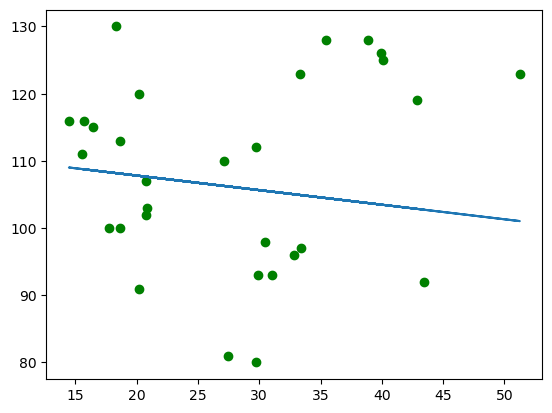

In [48]:
plt.scatter(x_test,y_test, color='g')
plt.plot(x_test,y_pred)